# XYZ Click Data

In [14]:
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [15]:
%watermark -a 'James Sibbit' -nmv --packages numpy,pandas,sklearn,matplotlib,seaborn,watermark

James Sibbit Wed Sep 16 2020 

CPython 3.7.3
IPython 7.4.0

numpy 1.16.2
pandas 1.1.1
sklearn 0.0
matplotlib 3.0.3
seaborn 0.9.0
watermark 2.0.2

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 18.0.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


In this notebook, we'll endeavour to analyse user activity on ads across a range of different sources, with the view of predicting whether a user will click.

## Data Cleaning

First, let's read in the data and have a quick look at it.

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold

# Import the data and check out the first few rows
click_data = pd.read_csv('data.csv')
click_data.head()

,Unnamed: 0,Addthis,Bebo,Blogcatalog,Blogger,Buddymedia,Cnet,Conduit,Customerlobby,Delicious,Digg,Diigo,Docs,Docstoc,Download,Dropbox,Drupal,Epinions,Evernote,Facebook,Faves,Feedburner,Flickr,Foursquare,Friendfeed,Hootsuite,Joomla,Jumptags,Kaboodle,Kickapps,Linkedin,Lithium,Livejournal,Mashable,Meetup,Metacafe,Mixx,Mouthshut,Multiply,Mybloglog,Myspace,Netvibes,Newsvine,Ning,Orkut,Photobucket,Ping,Pinterest,Plaxo,Plurk,Posterous,Propeller,Radian6,Reddit,Screencast,Scribd,Sharethis,Slashdot,Sliderocket,Slideshare,Squidoo,Startaid,Stumbleupon,Sysomos,Technorati,Thisnext,Tumblr,Tweetdeck,Twine,Twitter,Typepad,Ubertwitter,Viadeo,Vimeo,Vocus,Wetpaint,Wordpress,Xanga,Yelp,Yfrog,Youtube,Yuku,Click
0,dmp923122274,0,0,2,0,0,3,6,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,2,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,6,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,2,0,0,0,0,0,4,0,0,1,0,1,0
1,dmp458034174,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,6,1,0,5,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,4,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,12,0,2,2,12,0,0
2,dmp364043571,0,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,4,0,0,4,2,0,1,2,0,4,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,11,0,0,0,0,0,0
3,dmp461339655,0,0,0,0,0,0,0,0,0,0,Error: value not found,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6,0,0,0,22,0,0
4,dmp549691332,0,0,0,0,0,5,7,0,0,5,0,0,1,5,0,0,0,0,15,1,0,0,2,0,0,2,0,0,0,0,0,4,0,3,0,0,1,4,0,0,0,0,0,0,0,0,12,0,2,0,0,0,0,0,2,0,0,0,4,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


We're now going to explore the data a little bit, to check for any discrepancies.

In [17]:
pd.options.display.max_columns = None
click_data.describe()

,Addthis,Bebo,Blogcatalog,Blogger,Buddymedia,Cnet,Conduit,Customerlobby,Delicious,Digg,Docs,Docstoc,Download,Dropbox,Drupal,Epinions,Evernote,Facebook,Faves,Feedburner,Flickr,Foursquare,Friendfeed,Hootsuite,Joomla,Jumptags,Kaboodle,Kickapps,Linkedin,Lithium,Livejournal,Mashable,Meetup,Metacafe,Mixx,Mouthshut,Multiply,Mybloglog,Myspace,Netvibes,Newsvine,Ning,Orkut,Photobucket,Ping,Pinterest,Plaxo,Plurk,Posterous,Propeller,Radian6,Reddit,Screencast,Scribd,Sharethis,Slashdot,Sliderocket,Slideshare,Squidoo,Startaid,Stumbleupon,Sysomos,Technorati,Thisnext,Tumblr,Tweetdeck,Twine,Twitter,Typepad,Ubertwitter,Viadeo,Vimeo,Vocus,Wetpaint,Wordpress,Xanga,Yelp,Yfrog,Youtube,Yuku,Click
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.00000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.42250,0.78130,0.568100,2.823700,0.0,1.950400,2.142100,0.000200,0.393100,1.012700,0.003300,0.402900,1.0454,0.647000,0.469700,0.181600,0.165100,5.882000,0.172200,0.219200,1.643800,0.467000,0.301300,0.645500,0.700600,0.078000,0.274600,0.044200,1.245900,0.018900,1.601500,0.42450,0.276200,1.20040,0.32670,0.172800,1.019800,0.303000,3.283000,0.114700,9.637237e+06,1.403700,1.15270,1.909900,0.257800,1.3216,0.125300,0.169600,0.180300,0.28740,0.078700,0.348800,0.237000,0.853500,0.02160,0.232500,0.083200,0.484800,0.356100,0.020400,0.707200,0.045100,0.275100,0.201900,0.546300,0.097000,0.016800,2.587700,0.955800,0.001700,0.084800,0.41190,0.040200,0.293600,2.176900,0.459500,0.602200,0.380800,6.040600,0.206600,0.123400
std,1.01405,1.48899,1.197709,5.571438,0.0,2.937619,3.293993,0.014141,0.811319,2.266021,0.057354,0.800272,2.0234,1.319911,1.064986,0.504229,0.400072,8.735428,0.422333,0.661207,3.202865,0.984991,0.797108,1.526782,1.372206,0.323306,0.664559,0.205549,2.643129,0.136179,2.740593,0.96633,0.725511,2.02846,0.77112,0.470916,1.674063,0.677375,4.914196,0.416367,9.637237e+08,2.289902,2.10091,3.330659,0.549881,2.8751,0.445443,0.563975,0.514799,0.61696,0.270765,0.915436,0.515226,1.501753,0.14675,0.605707,0.276198,1.028044,0.972619,0.141371,1.352128,0.208015,0.766472,0.446269,1.168843,0.320626,0.129304,4.187178,1.855476,0.041198,0.351314,1.00436,0.196438,0.612402,3.691879,0.982169,1.194696,0.755413,7.892679,0.588856,0.328912
min,0.00000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00000

Mostly everything is looking okay here, except for a couple of things:

1. There is a clear error in the max value in Newsvine - we'll deal with this later.
2. Buddymedia has 0 impressions. We could remove this from the df and hence remove it as a predictor in our model, but as it will have no effect in our model and could gain impressions in the future, we leave it in for reproducibility reasons.

First, we want to check if there are any non-numeric values in our df that might mess with our analysis. We check types of entries, to see if there are any non-integer values.

In [18]:
types = click_data.iloc[:,click_data.columns!='Unnamed: 0'].dtypes
# Check what data types we have in our DF
print(types.unique())

[dtype('int64') dtype('O')]


In [19]:
# Now, we know the types are int64 and O, so see which columns aren't int64
for entry in types:
    if entry != 'int64':
        print(types[types==entry])

Diigo    object
dtype: object


We're seeing that all the columns in there only have integer values in them except Diigo - let's expore this column.

In [20]:
corrupt_vals = []
# Loop through values and see which ones aren't numbers
for entry in click_data['Diigo']:
    try:
        int(entry)
    except:
        corrupt_vals.append(entry)
print(set(corrupt_vals))

{'Error: value not found'}


Okay, so clearly we have some corrupt data here - all the missing values are encoded as 'Error: value not found', so let's go ahead and read in the data again, replacing these values with na values.

In [21]:
# Replace with NA
click_data_na = pd.read_csv('data.csv', na_values="Error: value not found")
click_data_na.head()

,Unnamed: 0,Addthis,Bebo,Blogcatalog,Blogger,Buddymedia,Cnet,Conduit,Customerlobby,Delicious,Digg,Diigo,Docs,Docstoc,Download,Dropbox,Drupal,Epinions,Evernote,Facebook,Faves,Feedburner,Flickr,Foursquare,Friendfeed,Hootsuite,Joomla,Jumptags,Kaboodle,Kickapps,Linkedin,Lithium,Livejournal,Mashable,Meetup,Metacafe,Mixx,Mouthshut,Multiply,Mybloglog,Myspace,Netvibes,Newsvine,Ning,Orkut,Photobucket,Ping,Pinterest,Plaxo,Plurk,Posterous,Propeller,Radian6,Reddit,Screencast,Scribd,Sharethis,Slashdot,Sliderocket,Slideshare,Squidoo,Startaid,Stumbleupon,Sysomos,Technorati,Thisnext,Tumblr,Tweetdeck,Twine,Twitter,Typepad,Ubertwitter,Viadeo,Vimeo,Vocus,Wetpaint,Wordpress,Xanga,Yelp,Yfrog,Youtube,Yuku,Click
0,dmp923122274,0,0,2,0,0,3,6,0,0,0,0.0,0,0,7,0,0,0,0,0,0,0,0,2,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,6,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,2,0,0,0,0,0,4,0,0,1,0,1,0
1,dmp458034174,0,3,0,0,0,0,1,0,0,0,0.0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,6,1,0,5,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,4,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,12,0,2,2,12,0,0
2,dmp364043571,0,2,0,0,0,0,0,0,2,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,4,0,0,4,2,0,1,2,0,4,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,11,0,0,0,0,0,0
3,dmp461339655,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6,0,0,0,22,0,0
4,dmp549691332,0,0,0,0,0,5,7,0,0,5,0.0,0,1,5,0,0,0,0,15,1,0,0,2,0,0,2,0,0,0,0,0,4,0,3,0,0,1,4,0,0,0,0,0,0,0,0,12,0,2,0,0,0,0,0,2,0,0,0,4,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [22]:
types_na = click_data_na.iloc[:,click_data_na.columns!='Unnamed: 0'].dtypes
print(types_na.unique())

[dtype('int64') dtype('float64')]


Okay, so we're good - all of the values are either integers or floats. Now, the next step is to decide how to deal with the NA values. We don't want to remove them as then we'll lose the impression data for that user from the other sites, so we're best replacing them with the value 0. Let's do that now.

In [23]:
# First, check how many NA values we have
for col in click_data_na.columns:
    try:
        assert(len(click_data_na.loc[click_data_na[col].isnull()]) == 0)
    except:
        print("We have "+ str(len(click_data_na.loc[click_data_na[col].isnull()])) + " NA values in column " + str(col) +" - this is in our na dataset")
# Now replace with 0
click_data_cleaned = click_data_na.fillna(0)
# Check again
i=1
for col in click_data_cleaned.columns:
    try:
        assert(len(click_data_cleaned.loc[click_data_cleaned[col].isnull()]) == 0)
    except:
        print("We have "+ str(len(click_data_cleaned.loc[click_data_cleaned[col].isnull()])) + " NA values in column " + str(col)+" - this is in our cleaned dataset")
        i=0
if i!=0:
    print("There are no NA values in click_data_cleaned")

We have 642 NA values in column Diigo - this is in our na dataset
There are no NA values in click_data_cleaned


Great, so we've now dealt with the NA values. Let's do some exploration of the dataset. First, import matplotlib.

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

Now, we manually check for outliers. Recall the problem we had with the max value in the Newsvine column earlier - let's check the whole datasets for outliers such as that one. We check if an entry if the value is greater than, say, 1000 clicks - this seems like a good benchmark to check whether an entry is real or not. We also check for negative values here. (<b>Note:</b> we informed this assumption by manually checking all unique click values and seeing the ranges they were in)

In [25]:
# Loop through all columns except the first, and see if there are any outliers (clicks that are <0 or >1000)
for column in click_data_cleaned.iloc[:,click_data_cleaned.columns!='Unnamed: 0'].columns:
    unique_values = click_data_cleaned[column].unique()
    for clicks in unique_values:
        if clicks>1000 or clicks<0:
            print("Possible error: in column '"+column+"' click count is: " + str(clicks))

Possible error: in column 'Newsvine' click count is: 96372367637


Okay so clearly there's an error here - there is at least one entry equal to 96372367637, which is clearly corrupted and we need to remove it. However, we can't just replace with 0 here, as then our click output will also likely be corrupted - best thing to do in this case is to remove the whole row. Let's do that now.

In [26]:
# Remove the row with the outlier in
for index, row in click_data_cleaned.iterrows():
    for entry in row:
        if entry == 96372367637:
            click_data_cleaned.drop(index, inplace=True)

Now, let's check whether this fixed our problem.

In [27]:
for column in click_data_cleaned.iloc[:,click_data_cleaned.columns!='Unnamed: 0'].columns:
    unique_values = click_data_cleaned[column].unique()
    for clicks in unique_values:
        if clicks>1000:
            print("Possible error: click count is: " + str(clicks))

Great, so that row is cleaned now, and there's no other entrys with >1000 clicks!

In [28]:
click_data_cleaned.to_csv('cleaned_data.csv')

## Model Exploration

Before we model the click behaviour, we need to split into training & testing data (use 80/20 split).

In [32]:
# Create training and testing datasets
x = click_data_cleaned.iloc[:,1:82]
y = click_data_cleaned.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=42)

Now, we need to come up with a way to model our click data. Let's think about some characteristics of our dataset, and decide how to proceed accordingly.
1. Input consists of 81 pieces of information on number of impressions from various different marketing channels
2. Output is binary, 0 = no click, 1 = click.

So, we know we need a binary classification algo - some possible choices could be the following:

1. LRC
3. Neural Net
4. SVM
5. Random Forest

<b>PLEASE READ:</b> At this point, I did some research into effective models for click data, and decided to try a Decsion Tree model, a Random Forest model and an SVM model. The decision tree & random forest had 86% and 90% CV accuracy respectively, and the RF had a very low recall & f1-score for class 1. As a result, I decided to go ahead with SVM, as this obtained a 97% accuracy (as you will see below). I removed the code for the DT & RF models, as I wanted to present one complete pipeline, but just wanted to motivate that I did carry out some model comparison, and didn't just choose SVM by blind luck!


Let's give SVM a shot. First, implement a naive solution with no param tuning.

In [33]:
from sklearn.svm import SVC
# Create SVM classifier (no hyperparam tuning yet)
svmclassifier = SVC(kernel='linear')
svmclassifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#Check confusion matrix, precision, recall, f1, support and accuracy
y_pred_svm = svmclassifier.predict(x_test)
print(confusion_matrix(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))
print(accuracy_score(y_test, y_pred_svm))

[[1749   21]
 [  22  208]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1770
           1       0.91      0.90      0.91       230

   micro avg       0.98      0.98      0.98      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.98      0.98      0.98      2000

0.9785


Already we're achieving a 97% accuracy with no hyperparm tuning! Let's tune hyperparams with CV and see what accuracy we can get.

In [68]:
from sklearn.model_selection import GridSearchCV
# Create parameter grid & carry out CV
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01],'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
grid_cv = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv=5)
grid_cv.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.9s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.8s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.8s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.8s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   5.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   5.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   5.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 62.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [69]:
# Pull the model with smallest CV error
svm_grid_model = grid_cv.best_estimator_
print(svm_grid_model)
# Now calc training & testing error for this model
svm_train_pred = svm_grid_model.predict(x_train)
svm_predictions_cv = svm_grid_model.predict(x_test)
print(confusion_matrix(y_test,svm_predictions_cv))
print(classification_report(y_test,svm_predictions_cv))
print("Training error is "+ str(100*round(accuracy_score(y_train, svm_train_pred),3))+"%")
print("Testing error is "+ str(100*round(accuracy_score(y_test, svm_predictions_cv),3))+"%")

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
[[1745   25]
 [  24  206]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1770
           1       0.89      0.90      0.89       230

   micro avg       0.98      0.98      0.98      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.98      0.98      0.98      2000

Training error is 98.0%
Testing error is 97.6%


After carrying out CV, it turns out that the best SVM was in fact the model with cost = 10, gamma = 1 and a linear kernel, so this is the model we use. We obtain a 97.6% testing accuracy, so we can see that SVM outperforms Random Forest by 7%! Moreover, our recall & f1-scores are much higher for SVM than for RF.

Now we want to see which features are most influential by looking at the absolute value of their coefficients (valid as we are using a linear kernel here). Create a function to do that.

In [54]:
svm_best_model = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
svm_best_model.fit(x_train, y_train)
svm_train_pred = svm_best_model.predict(x_train)
svm_predictions_cv = svm_best_model.predict(x_test)
print(confusion_matrix(y_test,svm_predictions_cv))
print(classification_report(y_test,svm_predictions_cv))
print("Training error is "+ str(100*round(accuracy_score(y_train, svm_train_pred),3))+"%")
print("Testing error is "+ str(100*round(accuracy_score(y_test, svm_predictions_cv),3))+"%")

[[1749   21]
 [  22  208]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1770
           1       0.91      0.90      0.91       230

   micro avg       0.98      0.98      0.98      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.98      0.98      0.98      2000

Training error is 97.89999999999999%
Testing error is 97.8%


In [45]:
svm_best_model.coef_[0]

array([ 0.70986662,  0.39187988,  1.38596624,  0.31832235,  0.        ,
        0.64092259,  0.18144734, 10.        ,  0.774268  ,  0.28723849,
        0.28634925,  1.1050736 ,  0.61338357,  0.2615761 ,  0.06315229,
        0.4655232 ,  2.46569248,  1.18556983,  0.06696752,  1.57518124,
        0.25858358,  0.20051362,  0.60341   ,  0.64633212,  0.22399809,
        0.49860214,  1.1959466 ,  2.55668302,  2.73367103,  0.26307682,
        2.86454881,  0.68656232,  1.58380534,  0.46095271,  0.37240836,
        0.88159438,  2.31584246,  0.3406398 ,  2.69586329,  0.16190755,
        0.86411058,  1.36496872,  0.37126919,  0.28551294,  0.22834325,
        0.79166936,  0.17673263,  0.80662383,  0.83998774,  0.98795089,
        1.09487984,  1.48059481,  0.54435568,  1.13244156,  0.60154318,
        1.97652995,  0.81816669,  2.30696154,  0.73522533,  0.48493427,
        2.05168572,  0.35981349,  1.53121327,  1.7538035 ,  4.5587999 ,
        0.6105956 ,  1.79379185,  2.64380755,  0.15019118,  0.90

In [47]:
svm_best_model.intercept_

array([-36.46474172])

In [53]:
svm_best_model.predict_proba(x_test)

array([[9.99854507e-01, 1.45492654e-04],
       [8.30844461e-01, 1.69155539e-01],
       [9.99997356e-01, 2.64352756e-06],
       ...,
       [9.99999416e-01, 5.83696835e-07],
       [4.14424528e-03, 9.95855755e-01],
       [9.99603749e-01, 3.96251095e-04]])

In [29]:
svm_grid_model.coef_[0]

NameError: name 'svm_grid_model' is not defined

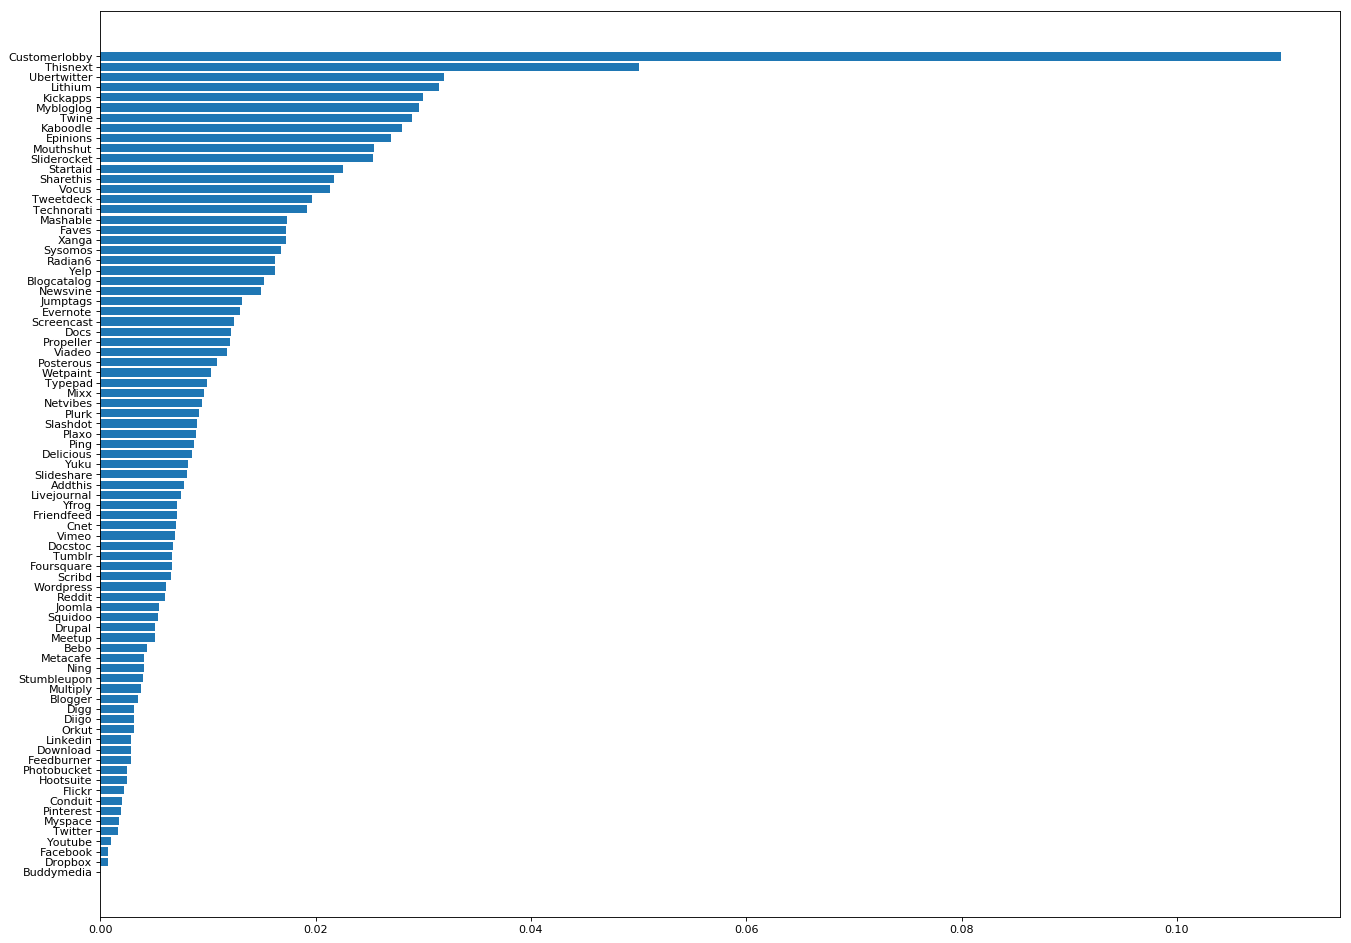

In [81]:
from matplotlib.pyplot import figure

# Define functions to plot most influential predictors by considering the size of their coefs. 
# Create one to take abs values, and another to consider the signs.

def f_importances_abs(coefs, names):
    total = sum(coefs)
    importance = abs(coefs)/total
    importance,names = zip(*sorted(zip(importance,names)))
    plt.barh(range(len(names)), importance, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

def f_importances_raw(coefs, names):
    total = sum(coefs)
    imp = coefs/total
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)

# Check if any coefs are negative, and if so, use function that plots absolute values. Otherwise, plot raw.
for entry in svm_grid_model.coef_[0]:
    if np.sign(entry) == -1:
        print("There is a negative coefficient")
        figure(num=None, figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')
        f_importances_abs(svm_grid_model.coef_[0], x.columns)

figure(num=None, figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')
f_importances_raw(svm_grid_model.coef_[0], x.columns)

So we can see the top 5 influential channels are:

1. Customerlobby
2. Thisnext
3. Ubertwitter
4. Lithium
5. Kickapps

We can also see here that we have no negative coefficients - this makes sense, as any amount of impressions is likely to increase the probability of a user clicking.

## Prediction

We will now use this SVM classifier to predict whether a user will click for a new dataset. Load in this data first.

In [72]:
pred_data = pd.read_csv('prediction.csv')
pred_data.head()

,Unnamed: 0,Addthis,Bebo,Blogcatalog,Blogger,Buddymedia,Cnet,Conduit,Customerlobby,Delicious,...,Viadeo,Vimeo,Vocus,Wetpaint,Wordpress,Xanga,Yelp,Yfrog,Youtube,Yuku
0,dmp813626769,0,0,0,10,0,0,0,0,1,...,0,1,0,0,0,3,0,1,0,0
1,dmp752138753,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,2,6,0
2,dmp646269971,3,0,3,0,0,0,0,0,1,...,0,0,0,0,0,2,0,2,0,0
3,dmp261229437,0,0,0,8,0,0,0,0,0,...,0,0,0,0,0,0,0,2,7,0
4,dmp881635703,0,0,0,0,0,3,0,0,0,...,0,0,0,0,4,2,2,1,13,2


Format the data so it is in the correct shape to be put through our classifier (ie. remove first col), and then output prediction for clicks using SVM classifier.

In [73]:
x_input = pred_data.iloc[:,1:82]

In [74]:
# Use SVM model to predict clicks for new data.
click_output_svm = svm_grid_model.predict(x_input)
print(click_output_svm)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 

We now append this prediction column to our dataframe and output the new csv.

In [75]:
pred_data['Click'] = click_output_svm
pred_data.head()

,Unnamed: 0,Addthis,Bebo,Blogcatalog,Blogger,Buddymedia,Cnet,Conduit,Customerlobby,Delicious,...,Vimeo,Vocus,Wetpaint,Wordpress,Xanga,Yelp,Yfrog,Youtube,Yuku,Click
0,dmp813626769,0,0,0,10,0,0,0,0,1,...,1,0,0,0,3,0,1,0,0,0
1,dmp752138753,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,2,6,0,0
2,dmp646269971,3,0,3,0,0,0,0,0,1,...,0,0,0,0,2,0,2,0,0,0
3,dmp261229437,0,0,0,8,0,0,0,0,0,...,0,0,0,0,0,0,2,7,0,0
4,dmp881635703,0,0,0,0,0,3,0,0,0,...,0,0,0,4,2,2,1,13,2,0


In [76]:
pred_data.to_csv('prediction.csv')

And we're done! We've gone through the whole pipeline, from data prep & cleaning, to model exploration, to predictions. Now all that's left is to figure out a way to summarise all this in a condensed PDF report...

## Extra Analysis

This section is purely for extra analysis regarding CTR & conversion rates, so we can gain some quantitative measures for our report. First, we check the entire CTR for our original data, so we can see what the ROI for the past 10 weeks of marketing have been.

In [77]:
# Consider total impressions & CTR using total impressions
impressions = x.sum()
total_impressions = impressions.sum()
total_clicks = y.sum()
ctr = total_clicks/impressions
total_ctr = total_clicks/total_impressions
print("Top ten channels by volume of impressions")
print(impressions.sort_values(ascending=False)[0:10])
print("Our total impressions were "+str(total_impressions))
print("Our total clicks were "+str(total_clicks))
print("Our total CTR was "+str(total_ctr))

Top ten channels by volume of impressions
Youtube        60386.0
Facebook       58820.0
Myspace        32830.0
Blogger        28229.0
Twitter        25877.0
Wordpress      21769.0
Conduit        21421.0
Cnet           19504.0
Photobucket    19099.0
Flickr         16438.0
dtype: float64
Our total impressions were 593238.0
Our total clicks were 1234
Our total CTR was 0.0020801095007400064


Okay, so we can see that the majority of impressions come from major social medias such as Youtube, Facebook, Myspace etc, which isn't massively surprising as the media networks of these social medias is expansive. We note here that our data <b>does not give us information on which site the source of a click can be attributed to</b>, so using CTR as a measure for each individual site could be misleading here. We spolve this problem later on - first, what's the breakeven rate for number of impressions to a click?

In [78]:
breakeven = round((1.03/2.31)*1000)
print(breakeven)
print(1/breakeven)

446
0.002242152466367713


So we see here that in order to breakeven, we need at least one click per 446 impressions, which is a CTR of 0.0022. At the moment, our total CTR is 0.0021, which means we didn't quite breakeven. What's the strategy here? Right now, there are two possible courses of action.

1. Take top 5 predictors in SVM model. Clearly they have a large degree of influence on whether a user clicks or not.
2. Take top 5 sources of impressions from the above table. Clearly they lead to a large number of impressions, which may not be as influential in gleaning clicks, but will be good for brand exposure.

One more thing we can do is to consider the data for which the user <b>actually clicked</b>, and see which channels had the highest impressions <b>as a percentage of total impressions for that click</b>.

In [79]:
names = click_data_cleaned.columns
cols = np.array(names)
cols = np.delete(cols, 0)
cols = np.delete(cols, -1)
# Create dictionary of all channels as keys, with 0 values.
cols_dict = dict(zip(cols, np.zeros(81)))

# Loop through rows, and if user has clicked, divide all values in that row by the total number of impressions in that row.
# Then, for each channel, add this value to the channel's corresponding value in the dictionary above.
for row in click_data_cleaned.iterrows():
    if row[1]['Click'] == 1:
        row_impressions = 0
        for name in cols:
            row_impressions += row[1][name]
        # Add percentage total contribution of each channel's impressions towards the click
        for name in cols:
            cols_dict[name] += row[1][name]/row_impressions
    else:
        continue

# Now, calculate each channel as a percentage of the total, and use this to determine channels with highest click attribution.
total_perc = sum(cols_dict.values())
print({x: 100*y/total_perc for x, y in sorted(cols_dict.items(), key=lambda item: item[1], reverse=True)})

{'Youtube': 7.9409620373930485, 'Facebook': 7.729864918167009, 'Blogger': 5.961670667982674, 'Myspace': 5.0584050982714475, 'Wordpress': 4.959072755343631, 'Cnet': 4.041745330078402, 'Twitter': 3.853993742672775, 'Livejournal': 3.664531521475365, 'Conduit': 3.1458196060198107, 'Photobucket': 3.0223595697335752, 'Flickr': 2.6900659202973185, 'Typepad': 2.3778351792071235, 'Ning': 2.2860429656361987, 'Linkedin': 2.034645099153638, 'Metacafe': 1.9289318102044604, 'Pinterest': 1.9223360189473064, 'Orkut': 1.7759670348798473, 'Digg': 1.6104739101533037, 'Multiply': 1.5894630806041783, 'Download': 1.5632016427776056, 'Yelp': 1.5056750047670235, 'Scribd': 1.4673674430669443, 'Blogcatalog': 1.3367859703353515, 'Bebo': 1.317257011346461, 'Joomla': 1.1688303113796725, 'Stumbleupon': 1.1344189434648198, 'Xanga': 1.0785284051088044, 'Mashable': 0.9968137134489258, 'Tumblr': 0.974971158790325, 'Hootsuite': 0.9585287526491212, 'Dropbox': 0.8790414882033251, 'Slideshare': 0.8127940124653776, 'Foursqu

So we can see that the five channels with the highest contribution towards conversion for instances where the user clicked are as follows:

1. Youtube
2. Facebook
3. Blogger
4. Myspace
5. Wordpress

We should consider these channels, as well as the ones highlighted by our model.